In [1]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
data=pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data= data[pd.notnull(data['CustomerID'])]

In [7]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

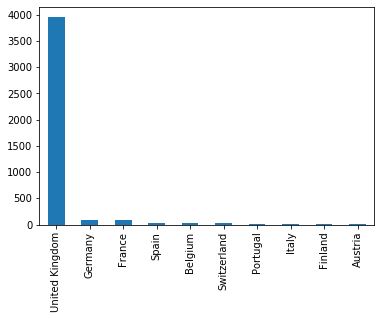

In [8]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In the given dataset, you can observe most of the customers are from the "United Kingdom". So, you can filter data for United Kingdom customer.

In [9]:
uk_data=data[data.Country=='United Kingdom']

In [10]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [11]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Here, we observe some of the customers have ordered in a negative quantity, which is not possible. So, we need to filter Quantity greater than zero.

In [12]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


Filter required Columns

- We can filter the necessary columns for RFM analysis. 
- We only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.
- CustomerId will uniquely define your customers, InvoiceDate help you calculate recency of purchase,   InvoiceNo helps you to count the number of time transaction performed(frequency).Quantity purchased   in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate   the total purchased amount.

In [13]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [14]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [15]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [16]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [17]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# RFM Analysis

- For Recency, Calculate the number of days between present date and date of last purchase each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer.

In [18]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [19]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [20]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [21]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


Now we split the metrics into segments using quantiles.We assign a score from 1 to 4 to Recency, Frequency and Monetary. One is the best/highest value, and four is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [22]:
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [23]:
segmented_rfm = rfm.copy()

In [24]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [25]:
segmented_rfm['R_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['monetary'].apply(FMScore, args=('monetary',quantiles))
segmented_rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


Best Recency score = 1: Purchased very recently. Best Frequency score = 1: highest quantity purchases. Best Monetary score = 1: spent the most.

In [26]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [27]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [28]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


Suggested marketing strategies on segmented customers:

- Best Customers- No price incentives, new products, and loyalty programs.
- Big Spenders- Market your most expensive products.
- Almost Lost- Aggresive price incentives
- Lost Customers-Don’t spend too much trying to re-acquire them.

In [29]:
segmented_rfm['RFM_Score'].unique()

array([ 9,  3,  5, 12,  7,  8,  6, 10, 11,  4], dtype=int64)

In [30]:
segmented_rfm.groupby('RFM_Score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count'] }).round(1)

recency frequency monetary      
             mean      mean     mean count
RFM_Score                                 
3             6.6     363.7   8218.2   409
4            20.3     187.0   3492.1   345
5            32.0     113.3   1909.4   386
6            47.0      78.9   1806.6   380
7            60.5      55.4    917.1   408
8            78.1      38.5    733.0   393
9            96.5      28.3    827.6   425
10          153.0      21.0    357.0   470
11          174.0      13.7    234.2   362
12          257.9       8.1    152.3   343

K-means gives the best result under the following conditions:

- Data’s distribution is not skewed.
- Data is standardised (i.e. mean of 0 and standard deviation of 1).

In [31]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

recency's: Skew: 1.244860838651939, : SkewtestResult(statistic=25.291774116968366, pvalue=3.934372193537644e-141)
frequency's: Skew: 18.662015317482382, : SkewtestResult(statistic=80.11405921257308, pvalue=0.0)
monetary's: Skew: 20.19301102927751, : SkewtestResult(statistic=81.76618091752813, pvalue=0.0)


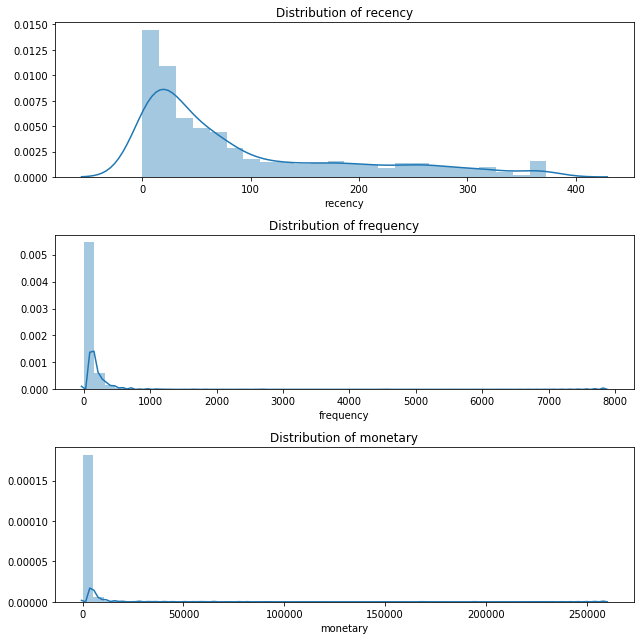

In [32]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm,'recency')

plt.subplot(3, 1, 2)
check_skew(rfm,'frequency')

plt.subplot(3, 1, 3)
check_skew(rfm,'monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable.I add a small constant as log transformation demands all the values to be positive.

In [33]:
df_rfm_log = rfm.copy()

recency's: Skew: -0.4630294020434312, : SkewtestResult(statistic=-11.303929134472378, pvalue=1.2547552326560962e-29)
frequency's: Skew: -0.02773073545771198, : SkewtestResult(statistic=-0.7101127795558876, pvalue=0.47763420205764984)
monetary's: Skew: 0.33277933053668907, : SkewtestResult(statistic=8.304523213848686, pvalue=1.0022107331622487e-16)


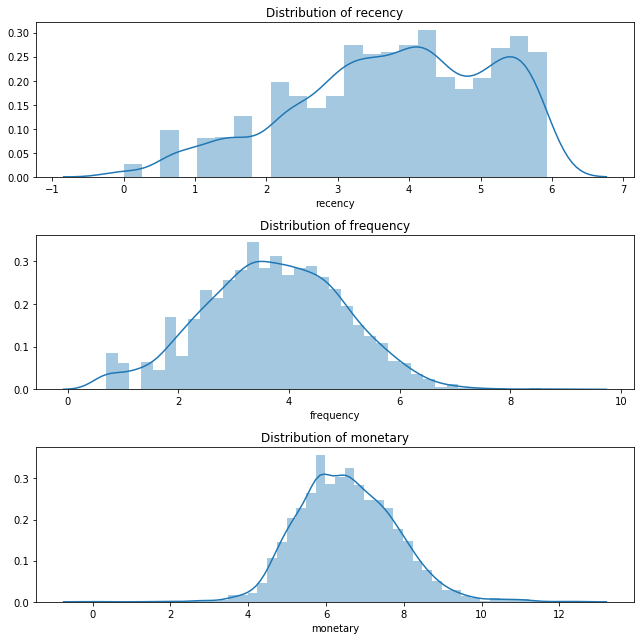

In [34]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [35]:
rfm.describe()

,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


In [36]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [37]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)

# K-Means Clustering

Finding the optimal number of clusters

In [38]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_

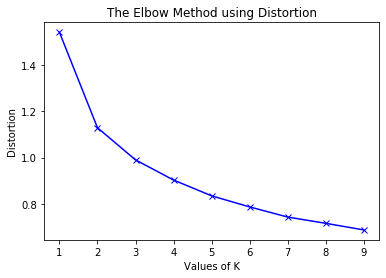

In [39]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

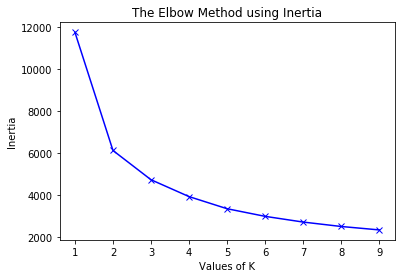

In [40]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data. Looking at the above elbow curve, we can choose any number of clusters between 4 to 7.

In [41]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

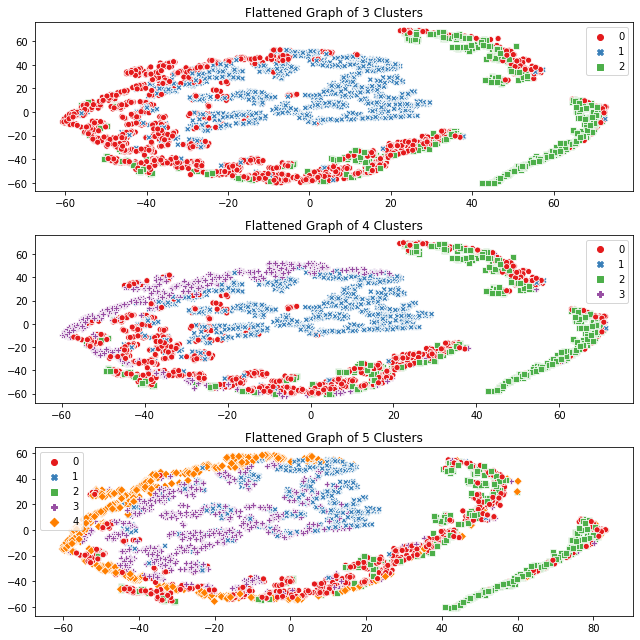

In [42]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, rfm)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

From the flattened graphs it is evident that having a cluster value of 4,segments our customers well. We could also go for higher number of clusters, it completely depends on how the company wants to segment their customers.

Interpretation of the clusters formed using k-means .

In [46]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [47]:
rfm_values(df_rfm_k4)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          88.0      84.0   1492.0  1162
1         191.0      15.0    291.0  1210
2          11.0     274.0   6222.0   776
3          23.0      33.0    509.0   773

conclusion

- The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1).
- Customers in the second cluster can be interpreted as passerby customers as their last purchase is long ago (R=4),purchased very few (F=4) and spent little (M=4).Company has to come up with new strategies to make them permanent members.
- The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=3), but used to purchase frequently and spent a lot.
- The last cluster are very Loyal Customers and they also spent a lot.